In [1]:
import altair as alt

from traffic.core import Traffic
from traffic.core.projection import EuroPP

import matplotlib.pyplot as plt
import numpy as np

from traffic.core.projection import EuroPP

import warnings
warnings.filterwarnings("ignore")

In [5]:
original_traffic = Traffic.from_file("../deep_traffic_generation/data/traffic_162-216_noga_tilFAF.pkl")
original_traffic = original_traffic.simplify(altitude = "altitude", tolerance = 1e3).eval(desc = "", max_workers = 20)
original_traffic

  0%|          | 0/4414 [00:00<?, ?it/s]

,count
flight_id,
SWR819_3796,32
SWR77E_3755,31
SWR1271_2680,30
SWR101R_1854,30
SWR134J_2891,30
SWR77E_3744,30
SWR75B_3664,30
SWR81C_3836,29
SWR1349_2844,29


<AxesSubplot:>

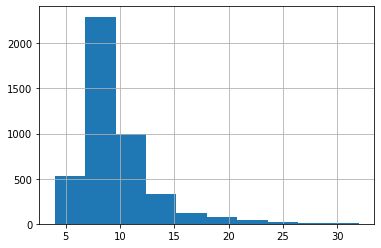

In [13]:
count = original_traffic.data.groupby("flight_id").timestamp.count()
count.hist()

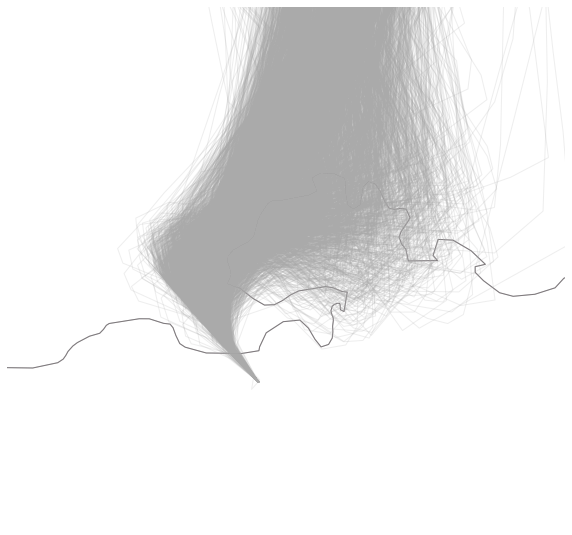

In [26]:
import matplotlib.pyplot as plt
from traffic.core.projection import CH1903p, EuroPP
from traffic.drawing import countries

flt = count[count < 12].index

with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 15), subplot_kw=dict(projection=EuroPP()))
    ax.add_feature(countries())
    ax.figure
    ax.set_extent((8, 9, 47.37, 48))
    original_traffic[flt].plot(ax, alpha=0.2)

In [40]:
#Douglas-Peucker

traffic = Traffic.from_file("../deep_traffic_generation/data/traffic_162-216.pkl")

simplified_t = (
    traffic
    .simplify(tolerance=1e3)
    .eval(desc="")
)
simplified_t

  0%|          | 0/4437 [00:00<?, ?it/s]

,count
flight_id,
EWG7ME_5129,31
SWR819_17004,30
SWR75B_16466,30
SWR1349_9689,29
SWR77E_16704,28
SWR134J_9740,28
SWR169A_11166,27
SWR109D_8470,25
SWR1189_8955,25


In [41]:
simplified_t.to_pickle("../deep_traffic_generation/data/traffic_162-216_dp.pkl")

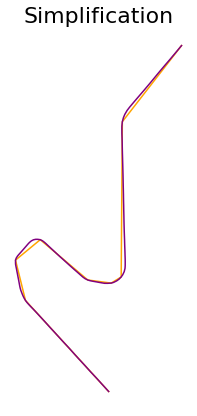

In [9]:
with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=EuroPP()))
    simplified_t[0].plot(ax, c="orange", label="Douglas-Peucker")
    traffic[0].plot(ax, c="purple", label="original")
    ax.set_title("Simplification")

    plt.show()

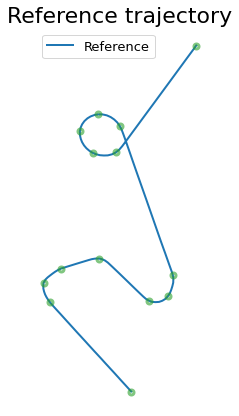

In [15]:
i = np.random.randint(len(traffic))

with plt.style.context("traffic"):
    ax = plt.axes(projection=EuroPP())
    ax.set_title("Reference trajectory")
    traffic[i].plot(ax, c="tab:blue", lw=2.0, label="Reference")
    # Douglas-Peucker
    simplified_t[i].plot(ax, mec="tab:green",mew=3.0,ms=10.0, mfc="none", marker=".", ls="", alpha=0.6)
    ax.legend(loc=0)